## **Regression: Decision Tree**

### **Learning objectives**
- Be able to preprocess data for machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/immoweb_data_processed.csv")

,Price,Type_of_Property,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Terrace,Garden,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,...,LOFT,MANOR_HOUSE,MANSION,MIXED_USE_BUILDING,OTHER_PROPERTY,PENTHOUSE,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA
Price,1.000000,-0.025793,0.327378,0.433501,0.287574,0.156315,0.039679,0.102217,0.080395,0.036304,...,0.063357,0.023250,0.055416,-0.004580,0.001824,0.149280,-0.031790,0.028024,0.025654,0.125042
Type_of_Property,-0.025793,1.000000,-0.570642,-0.596723,0.108579,0.121025,-0.374403,-0.722153,-0.367479,-0.011522,...,0.057256,-0.009211,-0.063239,-0.141038,-0.015954,0.128163,0.079296,-0.109473,0.050901,-0.129766
Number_of_Rooms,0.327378,-0.570642,1.000000,0.718805,0.004941,0.026337,0.243342,0.461847,0.243446,0.004799,...,-0.031135,0.014057,0.068712,0.035044,0.008653,-0.022729,-0.133046,0.068602,0.038920,0.102943
Living_Area,0.433501,-0.596723,0.718805,1.000000,0.035275,0.017058,0.227931,0.531552,0.279008,0.020757,...,0.057526,0.014788,0.091315,0.122360,0.012577,0.000620,-0.095312,0.097624,0.029822,0.137537
Fully_Equipped_Kitchen,0.287574,0.108579,0.004941,0.035275,1.000000,0.150268,0.009316,-0.056402,-0.017080,0.019336,...,0.036784,-0.003698,0.002332,-0.042645,-0.006405,0.079921,0.006646,0.022280,0.010748,0.029745
Terrace,0.156315,0.121025,0.026337,0.017058,0.150268,1.000000,0.053052,-0.060237,-0.009104,0.024776,...,0.013372,0.005483,-0.005091,-0.058634,0.009497,0.085353,-0.007969,-0.022490,0.011570,0.004265
Garden,0.039679,-0.374403,0.243342,0.227931,0.009316,0.053052,1.000000,0.315758,0.121037,0.034739,...,-0.010817,0.016030,0.022232,-0.006947,0.016195,-0.063606,-0.031333,0.052712,-0.007188,0.064500
Surface_area_plot_of_land,0.102217,-0.722153,0.461847,0.531552,-0.056402,-0.060237,0.315758,1.000000,0.490213,0.046808,...,-0.041348,-0.005041,0.017855,0.042799,-0.000784,-0.092553,-0.057264,0.051794,-0.036759,0.247021
Number_of_Facades,0.080395,-0.367479,0.243446,0.279008,-0.017080,-0.009104,0.121037,0.490213,1.000000,0.046213,...,-0.010065,0.018552,-0.012147,-0.044350,0.014902,-0.011426,-0.044604,-0.036943,-0.017480,0.241636
Swimming_Pool,0.036304,-0.011522,0.004799,0.020757,0.019336,0.024776,0.034739,0.046808,0.046213,1.000000,...,0.006484,-0.000664,-0.004560,-0.010170,-0.001150,0.004074,0.027055,0.016929,-0.004843,0.032677


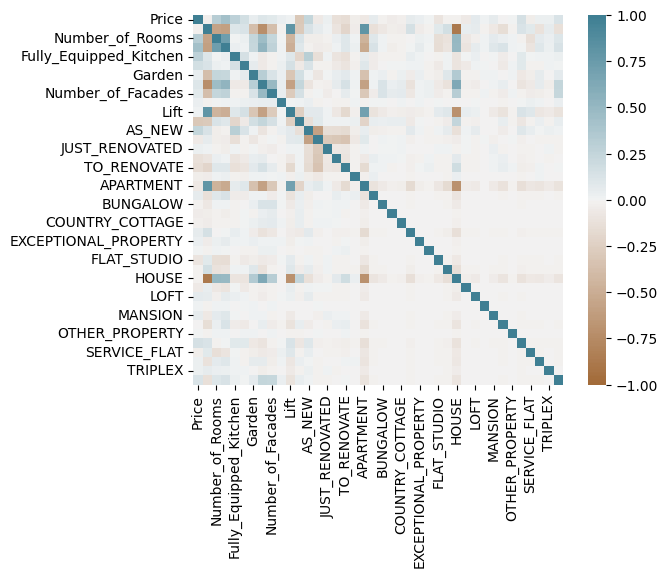

In [7]:
corr = df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(40, 220, n=200),
    square=True,
)
corr

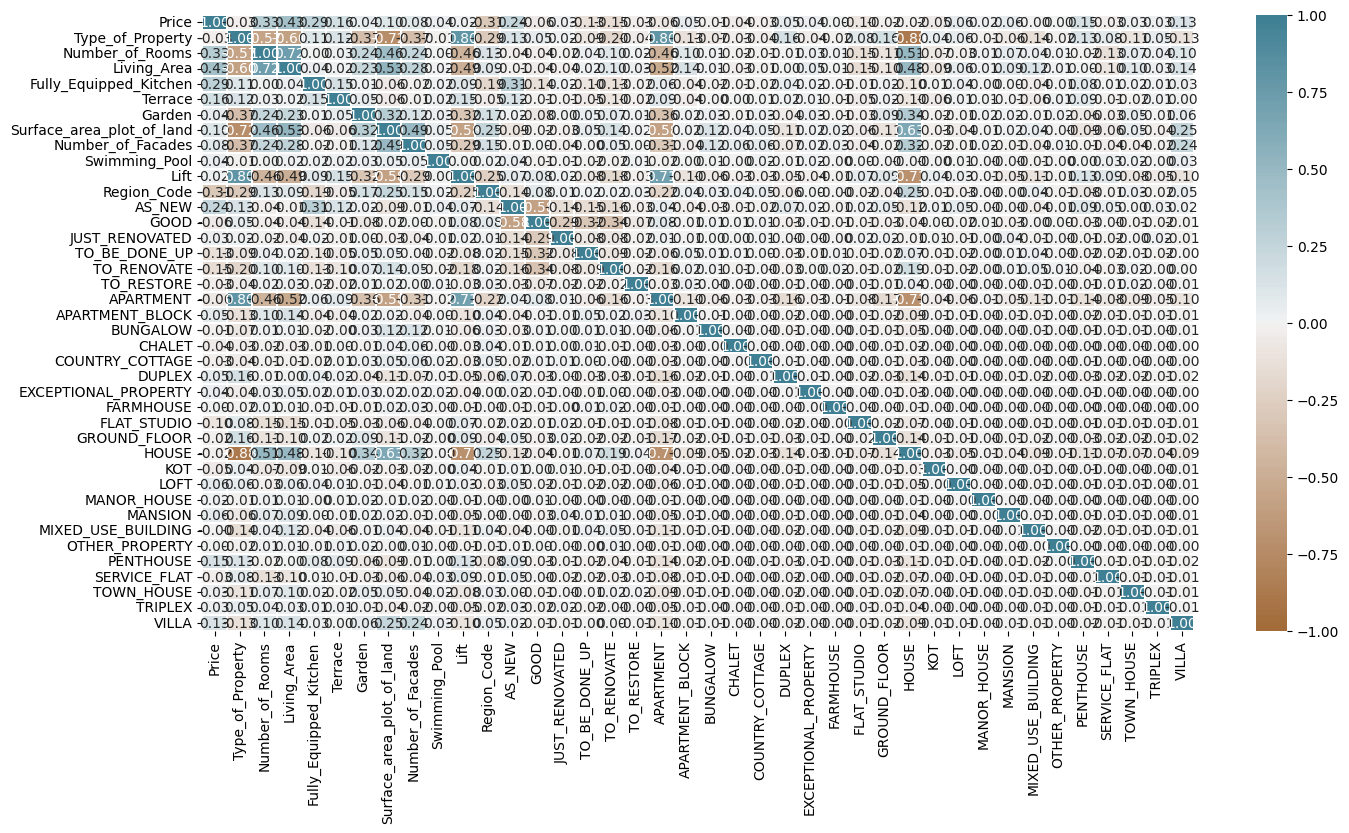

In [8]:
plt.subplots(figsize=(16, 8))
sns.heatmap(
    df.corr(),
    annot=True,
    linewidths=0.05,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(40, 220, n=200),
)

plt.show()

### **Random Forest**

The main steps in the 1st Model of Random Forest with the general evaluations r2, mse, rmse, mae and separate on train and test sets:
- Import required libraries;
- Select features (X) and target (y) - I put all features separately to try different group of them to find the best group;
- Split the data into training and testing sets - I want to try two test_size: 0.22 or 0.33;
- Predict using the trained model;
- Create and train the Random Forest model;
- Evaluate the model;
- Cross-validation to check robustness
- Visualize actual vs predicted prices for the train and test sets;
- Feature importance analysis
- Display the results

Training Set Performance:
R² Score: 0.5557598892245861
Mean Squared Error (MSE): 10073300678.682955
Root Mean Squared Error (RMSE): 100365.83422003205
Mean Absolute Error (MAE): 72321.4973339466

Testing Set Performance:
R² Score: 0.5050437364164431
Mean Squared Error (MSE): 10848545631.866943
Root Mean Squared Error (RMSE): 104156.3518555971
Mean Absolute Error (MAE): 75687.4478682724



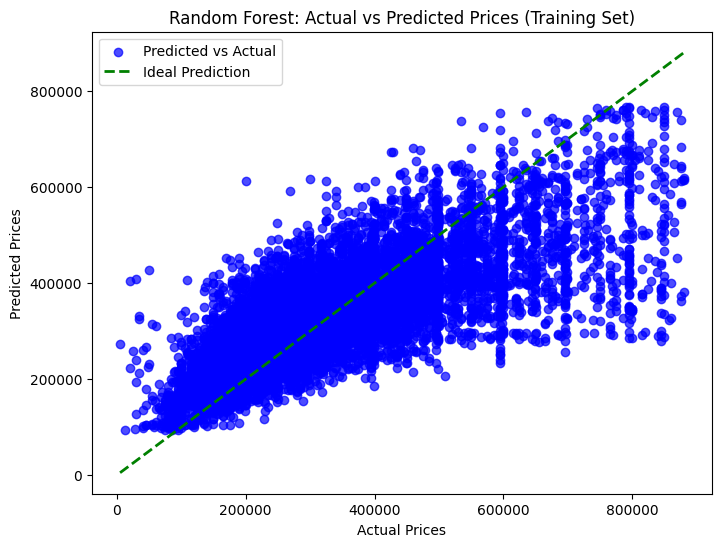

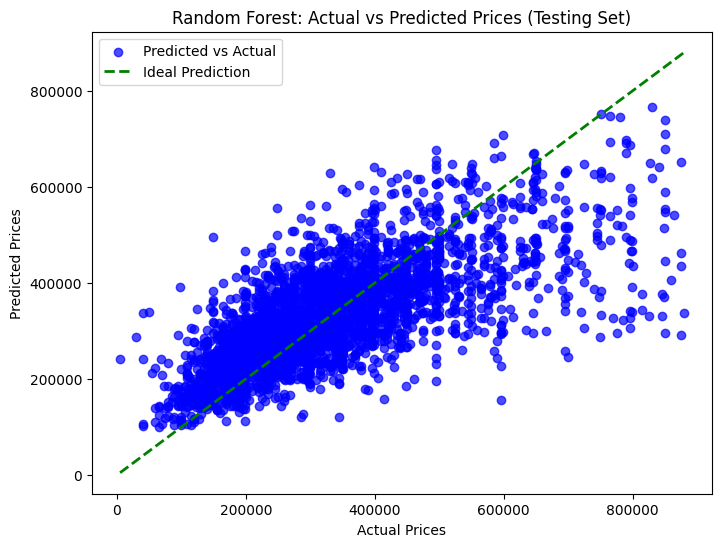

Cross-Validated R² Scores: [0.54500171 0.51135715 0.47766754 0.52611546 0.47682392 0.46105765
 0.48708745 0.48663609 0.5133951  0.50352611]
Mean R² Score from Cross-Validation: 0.4988668176127723

Feature Importance:
                      Feature  Importance
2                 Living_Area    0.414775
8                 Region_Code    0.271200
3      Fully_Equipped_Kitchen    0.051657
9                      AS_NEW    0.050627
13                TO_RENOVATE    0.047689
17                      HOUSE    0.036091
6   Surface_area_plot_of_land    0.033003
1             Number_of_Rooms    0.022142
4                     Terrace    0.013456
12              TO_BE_DONE_UP    0.012301
0            Type_of_Property    0.009258
7           Number_of_Facades    0.008031
18                  PENTHOUSE    0.007085
11             JUST_RENOVATED    0.005909
10                       GOOD    0.005675
15                  APARTMENT    0.004480
5                      Garden    0.003483
20                      VIL

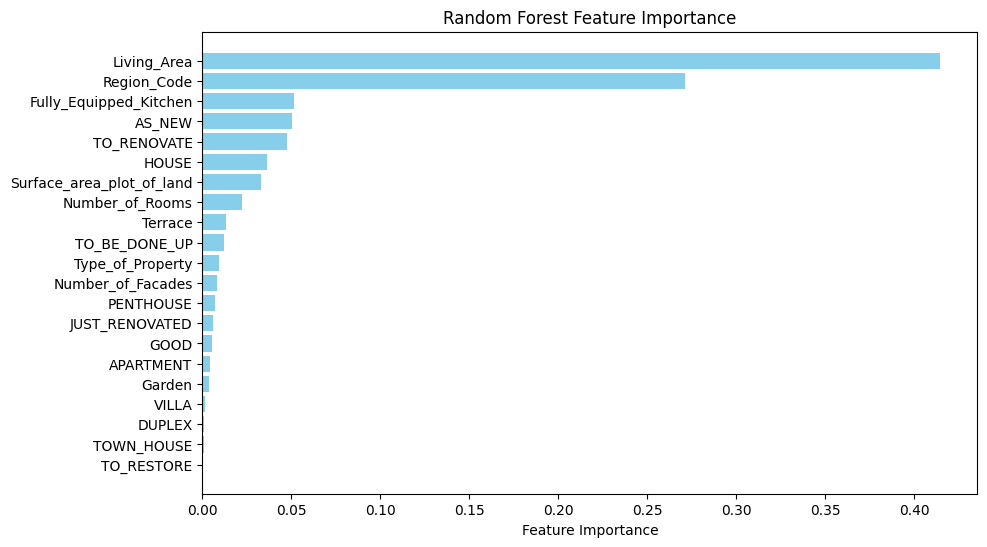

In [14]:
# Import required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with the required columns
# Select features (X) and target (y)
X = df[
    [
        "Type_of_Property",
        "Number_of_Rooms",
        "Living_Area",
        "Fully_Equipped_Kitchen",
        "Terrace",
        "Garden",
        "Surface_area_plot_of_land",
        "Number_of_Facades",
        "Region_Code",
        "AS_NEW",
        "GOOD",
        "JUST_RENOVATED",
        "TO_BE_DONE_UP",
        "TO_RENOVATE",
        "TO_RESTORE",
        "APARTMENT",
        "DUPLEX",
        "HOUSE",
        "PENTHOUSE",
        "TOWN_HOUSE",
        "VILLA",
    ]
]
y = df["Price"]

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=42
)

# Step 2: Create and train the Random Forest model
rf_regressor = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,  # Maximum depth of each tree
    min_samples_split=20,  # Minimum samples required to split an internal node
    min_samples_leaf=10,  # Minimum samples required to be a leaf node
    random_state=42,
    n_jobs=-1,  # Use all available processors for parallel processing
)
rf_regressor.fit(X_train, y_train)

# Step 3: Predict using the trained model
pred_train = rf_regressor.predict(X_train)
pred_test = rf_regressor.predict(X_test)


# Step 4: Evaluate the model on training and testing sets
def evaluate_model(y_true, y_pred, dataset_type):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{dataset_type} Set Performance:")
    print("R² Score:", r2)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print()


evaluate_model(y_train, pred_train, "Training")
evaluate_model(y_test, pred_test, "Testing")


# Step 5: Visualize actual vs predicted prices for the train and test sets
def plot_actual_vs_predicted(y_true, y_pred, dataset_type):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color="blue", alpha=0.7, label="Predicted vs Actual")
    plt.plot(
        [y_true.min(), y_true.max()],
        [y_true.min(), y_true.max()],
        "g--",
        lw=2,
        label="Ideal Prediction",
    )
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Random Forest: Actual vs Predicted Prices ({dataset_type} Set)")
    plt.legend()
    plt.show()


plot_actual_vs_predicted(y_train, pred_train, "Training")
plot_actual_vs_predicted(y_test, pred_test, "Testing")

# Step 6: Cross-validation to check robustness
cv_scores = cross_val_score(rf_regressor, X, y, cv=10, scoring="r2", n_jobs=-1)
print("Cross-Validated R² Scores:", cv_scores)
print("Mean R² Score from Cross-Validation:", np.mean(cv_scores))

# Step 7: Feature importance analysis
feature_importances = rf_regressor.feature_importances_
features_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
features_df = features_df.sort_values(by="Importance", ascending=False)
print("\nFeature Importance:")
print(features_df)

# Optional: Visualize feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(features_df["Feature"], features_df["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

**Training Set Performance:**
- R² Score: 0.5558  

    - This indicates that the model explains about 55.58% of the variance in the target variable (Price) on the training data. It is a moderate fit but leaves room for improvement. A higher R² would indicate a better fit to the training data.  

- Mean Squared Error (MSE): 10,073,300,678.68  

    - This is the average of the squared differences between the predicted values and the actual values. A lower MSE suggests better performance, but this value is quite large, which could indicate that the model might not be fully capturing the complexities of the data.  

- Root Mean Squared Error (RMSE): 100,365.83  

    - RMSE is the square root of the MSE, providing a more interpretable error metric in the same units as the target variable (Price). In this case, on average, the model's predictions are off by around 100,365.83 units of currency.  

- Mean Absolute Error (MAE): 72,321.50  

    - MAE measures the average absolute difference between predicted and actual values. It gives an idea of how much the predictions are off in an absolute sense. Here, the model's average prediction error is about 72,321.50 units.  

**Testing Set Performance:**  
- R² Score: 0.5050  

    - n the test set, the R² score drops to 50.50%, which means the model explains less variance in the unseen data than in the training data. This may indicate overfitting, where the model performs well on the training data but doesn't generalize as well to new, unseen data.  

- Mean Squared Error (MSE): 10,848,545,631.87  

    - The MSE on the test set is quite similar to the training set, indicating that the model's performance is relatively consistent across both datasets.  

- Root Mean Squared Error (RMSE): 104,156.35  

    - The RMSE on the test set is also similar to the training set, meaning the model's prediction errors are comparable in both datasets.  

- Mean Absolute Error (MAE): 75,687.45  

    - The MAE for the test set is slightly higher than for the training set, indicating the model has slightly more difficulty predicting on unseen data.  

**Summary and Insights:**
1. **Overfitting:** The model performs significantly better on the training set (higher R²) than on the testing set, suggesting overfitting. The model may have learned the training data too well, capturing noise or irrelevant patterns that don't generalize well to new data.

2. **Performance:** The model's performance is moderate overall, with R² values around 50-55% for both the training and testing sets. The RMSE and MAE indicate relatively large prediction errors, meaning there is room for improvement in terms of accuracy.

**Next Steps to Improve:**
Tune Hyperparameters: Consider tuning the hyperparameters of the Random Forest (such as n_estimators, max_depth, min_samples_split, and min_samples_leaf) to improve the model's performance. You can use GridSearchCV or RandomizedSearchCV for hyperparameter optimization.

To tune the hyperparameters of the Random Forest model, we can use GridSearchCV or RandomizedSearchCV from sklearn.model_selection.  
These tools will help you systematically search for the best combination of hyperparameters.  

Let`s try apply **GridSearchCV** for hyperparameter tuning:  

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


c:\Users\fomic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
675 fits failed out of a total of 2025.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
547 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fomic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\fomic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\fomic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Training Set Performance:
R² Score: 0.6349216687269621
Mean Squared Error (MSE): 8278279500.169495
Root Mean Squared Error (RMSE): 90985.05097085726
Mean Absolute Error (MAE): 65790.41681868718

Testing Set Performance:
R² Score: 0.5175708544961078
Mean Squared Error (MSE): 10573973872.457163
Root Mean Squared Error (RMSE): 102829.82968213632
Mean Absolute Error (MAE): 74614.23761038651



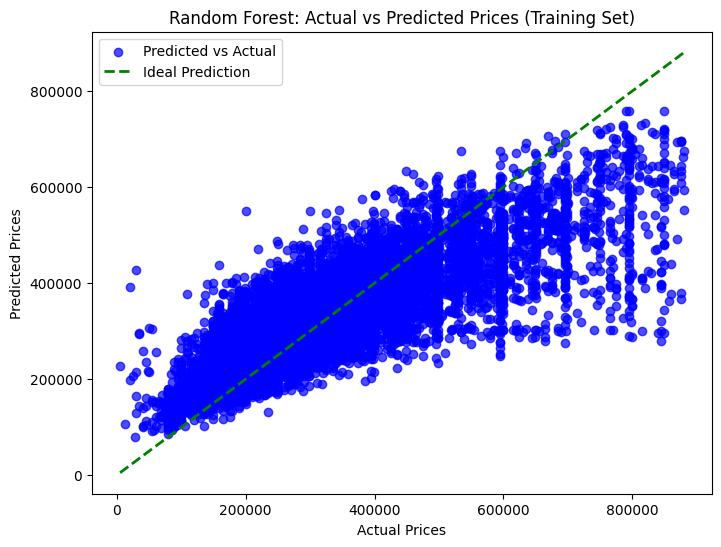

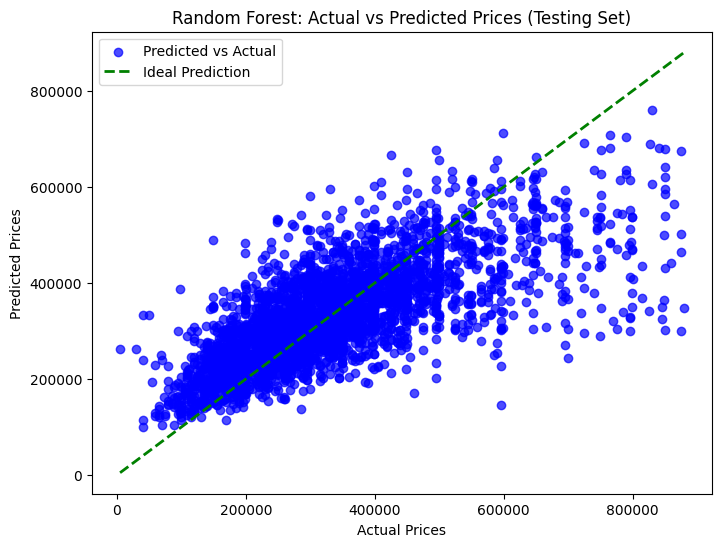

In [15]:
# Import required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the parameter grid to search over
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees in the forest
    "max_depth": [5, 10, 15, 20, None],  # Maximum depth of each tree
    "min_samples_split": [
        2,
        10,
        20,
    ],  # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 5, 10],  # Minimum samples required to be a leaf node
    "max_features": [
        "auto",
        "sqrt",
        "log2",
    ],  # Maximum number of features to consider for each split
}

# Create the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Setup the GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="r2",  # Use R² as the scoring metric
    n_jobs=-1,  # Use all available processors for parallel processing
    verbose=2,  # To print the progress of the grid search
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the performance of the tuned model on the training and testing sets
pred_train_tuned = best_model.predict(X_train)
pred_test_tuned = best_model.predict(X_test)


# Evaluate the model on training and testing sets
def evaluate_model(y_true, y_pred, dataset_type):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{dataset_type} Set Performance:")
    print("R² Score:", r2)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print()


evaluate_model(y_train, pred_train_tuned, "Training")
evaluate_model(y_test, pred_test_tuned, "Testing")

# Visualize actual vs predicted prices for the train and test sets
plot_actual_vs_predicted(y_train, pred_train_tuned, "Training")
plot_actual_vs_predicted(y_test, pred_test_tuned, "Testing")

**Explanation:**
1. **Parameter Grid:**

- The param_grid dictionary contains the hyperparameters to tune (n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features) along with their possible values. This grid will be used by GridSearchCV to perform an exhaustive search for the best combination.  

2. **GridSearchCV:**

- The GridSearchCV object performs the cross-validation and searches for the best combination of hyperparameters based on the performance (R² in this case).  
- cv=5: The number of folds for cross-validation (5-fold cross-validation).  
- scoring='r2': This means the search will optimize for the R² score.  
- n_jobs=-1: Utilizes all available processors for parallel computation.  
- verbose=2: Prints progress information for each step.  

3. **Fit and Evaluate:**

- After finding the best hyperparameters with grid_search.fit(), the best model is accessed via grid_search.best_estimator_.  
- We then use this tuned model to predict the training and testing data (pred_train_tuned, pred_test_tuned) and evaluate the performance using metrics like R², MSE, RMSE, and MAE.  

4. **Visualization:**

- The plot_actual_vs_predicted() function is used to visualize the model's performance by plotting actual vs predicted prices for both the training and testing datasets.  

**Alternative: RandomizedSearchCV (Faster Approach)**  
If the grid search takes too long due to many parameter combinations, you can use RandomizedSearchCV, which samples a random subset of the parameter space and is generally faster:

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\fomic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
140 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fomic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\fomic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\fomic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

Best Hyperparameters from RandomizedSearchCV: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}
Training Set Performance:
R² Score: 0.6349216687269621
Mean Squared Error (MSE): 8278279500.169495
Root Mean Squared Error (RMSE): 90985.05097085726
Mean Absolute Error (MAE): 65790.41681868718

Testing Set Performance:
R² Score: 0.5175708544961078
Mean Squared Error (MSE): 10573973872.457163
Root Mean Squared Error (RMSE): 102829.82968213632
Mean Absolute Error (MAE): 74614.23761038651



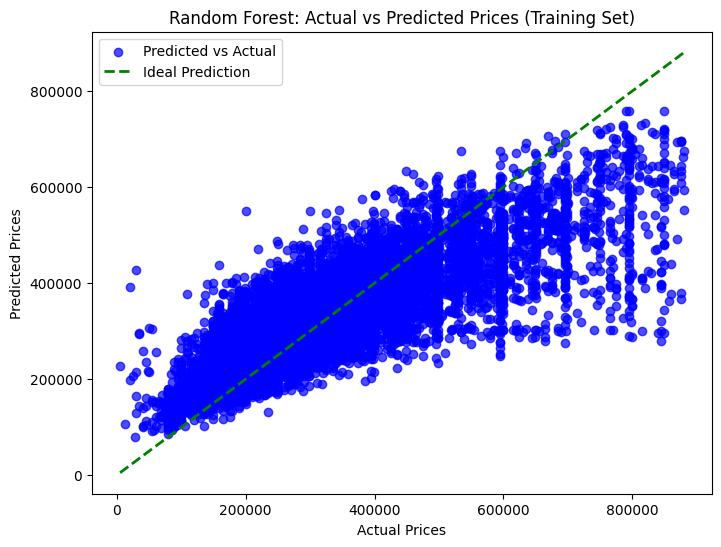

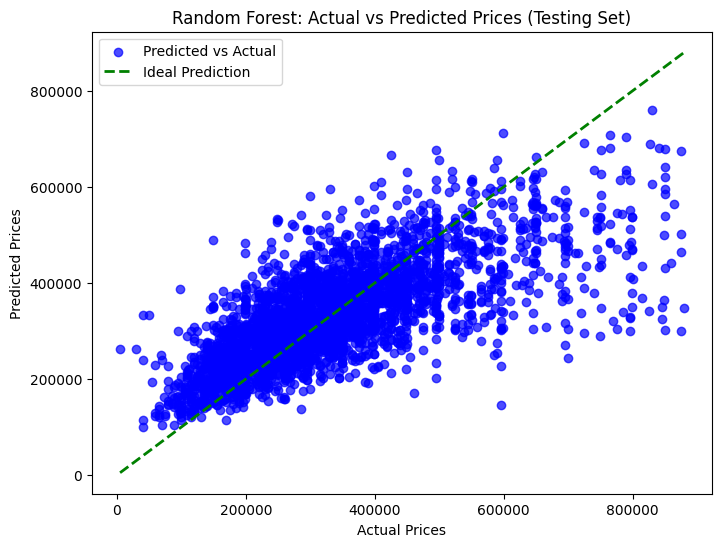

In [16]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 10, 20, 30],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["auto", "sqrt", "log2"],
}

# Create Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Setup the RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring="r2",  # Use R² as the scoring metric
    n_jobs=-1,  # Use all processors
    random_state=42,
    verbose=2,
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model and parameters
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

print("Best Hyperparameters from RandomizedSearchCV:", best_params_random)

# Evaluate the model
pred_train_random = best_model_random.predict(X_train)
pred_test_random = best_model_random.predict(X_test)

evaluate_model(y_train, pred_train_random, "Training")
evaluate_model(y_test, pred_test_random, "Testing")
plot_actual_vs_predicted(y_train, pred_train_random, "Training")
plot_actual_vs_predicted(y_test, pred_test_random, "Testing")

**Difference between GridSearchCV and RandomizedSearchCV:**
- GridSearchCV: Tests all combinations of parameters in the grid.  
- RandomizedSearchCV: Tests a fixed number of random combinations of parameters, which can be faster than GridSearchCV when the parameter space is large.  